In [160]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [161]:
from sklearn import datasets
#load iris dataset
df = datasets.load_iris()

In [162]:
#Convert to dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [163]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [164]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


* Visualize scatter plot

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

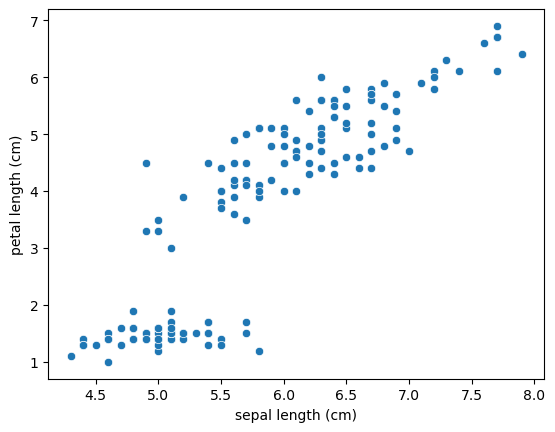

In [167]:
sns.scatterplot(df,x='sepal length (cm)', y='petal length (cm)')

<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

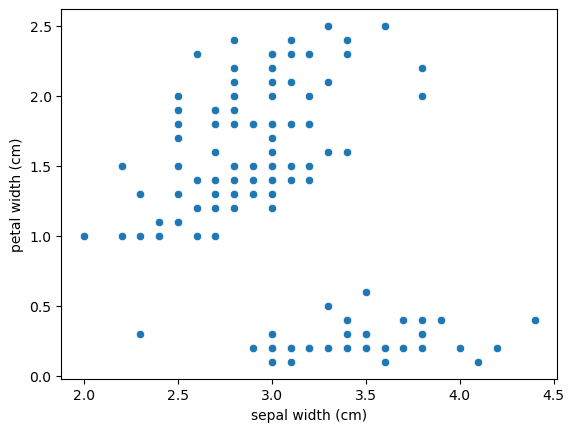

In [168]:
sns.scatterplot(df,x='sepal width (cm)', y='petal width (cm)')

* Elbow Method to Determine Optimal Number of Clusters

In [170]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

* Plotting the Elbow Curve

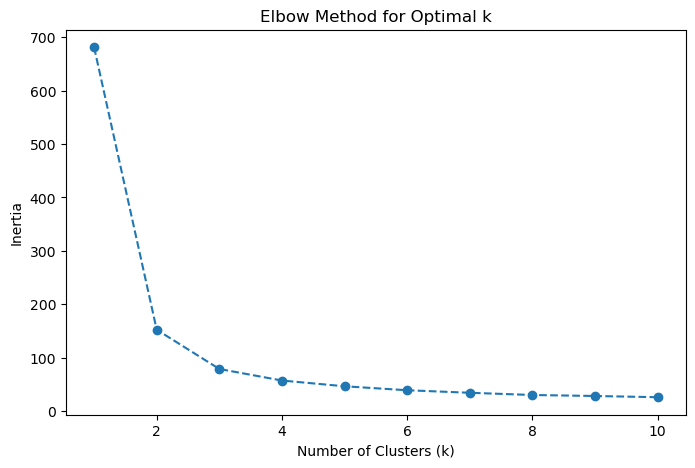

In [172]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [173]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# K means Clustering
* K-Means Clustering is an Unsupervised Machine Learning algorithm which groups the unlabeled dataset into different clusters. The article aims to explore the fundamentals and working of k means clustering along with its implementation.
* The algorithm works by first randomly picking some central points called centroids and each data point is then assigned to the closest centroid forming a cluster.
* After all the points are assigned to a cluster the centroids are updated by finding the average position of the points in each cluster. This process repeats until the centroids stop changing forming clusters.
* The goal of clustering is to divide the data points into clusters so that similar data points belong to same group.

In [175]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300)  # Example with 3 clusters

In [176]:
kmeans.fit_predict(scaled_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [177]:
df["KmeansCluster"]=kmeans.labels_

In [178]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KmeansCluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* Evaluate Model Performance

In [180]:
# Choose Optimal Number of Clusters (e.g., 4 from elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df)

# 1. Silhouette Score
sil_score = silhouette_score(df, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 2. Davies-Bouldin Index
db_score = davies_bouldin_score(df, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

Silhouette Score: 0.58
Davies-Bouldin Index: 0.74
Calinski-Harabasz Index: 503.63


# Hierarchical Clustering
* Hierarchical clustering is a technique used to group similar data points together based on their similarity creating a hierarchy or tree-like structure.
* The key idea is to begin with each data point as its own separate cluster and then progressively merge or split them based on their similarity.

* A dendrogram is like a family tree for clusters. It shows how individual data points or groups of data merge together.
* The bottom shows each data point as its own group, and as you move up, similar groups are combined.
* The lower the merge point, the more similar the groups are. It helps you see how things are grouped step by step.

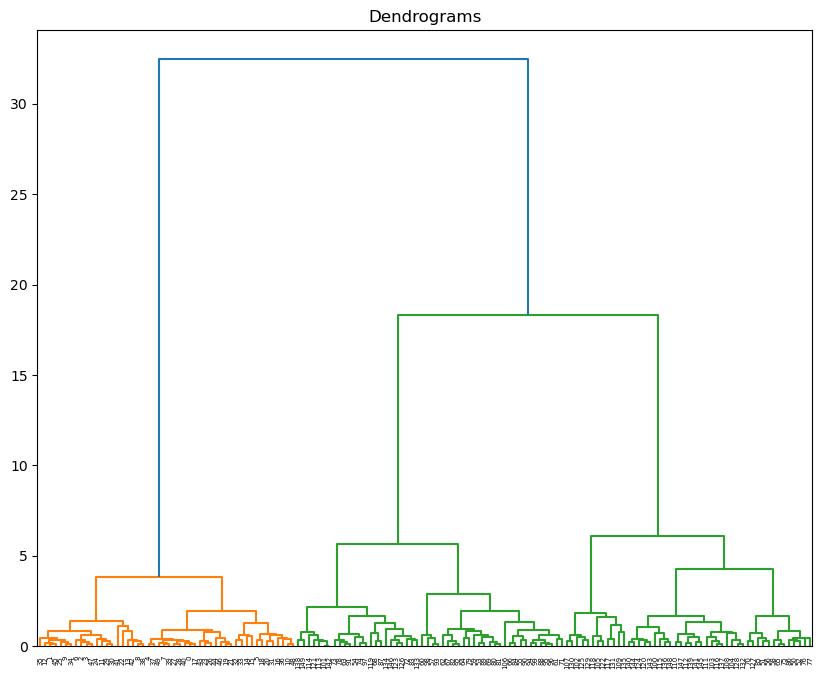

In [183]:
# Plotting a Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (df, method='ward'))

In [184]:
clusters = AgglomerativeClustering()
clusters.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [185]:
df['AgglomerativeCluster']=clusters.fit_predict(df)

In [186]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KmeansCluster,AgglomerativeCluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [187]:
uniquecolors = set(dend["color_list"])
uniquecolors

{'C0', 'C1', 'C2'}

In [188]:
optimal_number_of_clusters = len(uniquecolors)-1
optimal_number_of_clusters

2

In [189]:
# Evaluate the clustering performance
from sklearn.metrics import silhouette_score, davies_bouldin_score
# 1. Silhouette Score
# Higher values indicate better-defined clusters.
sil_score = silhouette_score(df, df['AgglomerativeCluster'])
print(f"Silhouette Score: {sil_score:.2f}") 
# 2. Davies-Bouldin Index
# Lower values indicate better-defined clusters.
db_score = davies_bouldin_score(df, df['AgglomerativeCluster'])
print(f"Davies-Bouldin Index: {db_score:.2f}")
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df, df['AgglomerativeCluster'])
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
# Higher values indicate better-defined clusters.

Silhouette Score: 0.63
Davies-Bouldin Index: 0.48
Calinski-Harabasz Index: 325.18
